In [19]:
import pandas as pd
import json
import requests
import json
from bs4 import BeautifulSoup as BS
import time
import mysql.connector
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import config1
cnx = mysql.connector.connect(
    host = config1.host,
    user = config1.user,
    passwd = config1.password
)
cursor = cnx.cursor()


In [21]:
def get_data(school_id):
    id = school_id
    url_ex = f'http://www.ratemyprofessors.com/filter/professor/?&page=1&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid={id}'
    response = requests.get(url_ex)
    data = json.loads(response.text)
    num_of_professors = data['searchResultsTotal']
    num_divided = num_of_professors / 20
    
    if isinstance(num_divided, float) == True:
        num_divided = int(num_divided + 1)
        
    professors = []    
    for i in range(1, num_divided):
        id = school_id
        url = f'http://www.ratemyprofessors.com/filter/professor/?&page={i}&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid={id}'
        response = requests.get(url)
        data = json.loads(response.text)
        professors.append(data)
    new_list = []
    for i in range(len(professors)):
        prof_data = professors[i]['professors']
        new_list.append(prof_data)
    prof = []
    for i in range(len(new_list)):
        a = new_list[i]
        for j in range(len(a)):
            b = a[j]
            prof.append(b)
    
    prof_list = []
    
    for i in range(len(prof)):
            overall_rating = prof[i]['overall_rating']
            if overall_rating == 'N/A':
                continue
            else:
                school = prof[i]['institution_name']
                dept = prof[i]['tDept']
                name = prof[i]['tLname'] + ' ' + prof[i]['tFname']
                num_ratings = prof[i]['tNumRatings']
                rating = prof[i]['overall_rating']
                prof_tuple = (school, name, dept, float(rating), num_ratings)
                prof_list.append(prof_tuple)
    return prof_list

In [64]:
def connect_database(database, table):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )

    cursor = cnx.cursor()
    cursor.execute("CREATE DATABASE {} ".format(database))
    cnx.database = database
# connects to AWS server, creates cursor, creates database

In [65]:
def create_table(table):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )
    cursor = cnx.cursor()
    cursor.execute("CREATE TABLE {} ".format(table) +
                   "(name varchar(100) NOT NULL, department varchar(100), rating float, num_ratings int)")

In [66]:
def drop_database(database):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )

    cursor = cnx.cursor()
    cursor.execute("DROP DATABASE {} ".format(database))
    cnx.database = database   

In [68]:
def insert_data(table, list_name):
    statement = "INSERT INTO {}".format(table) + " (school, name, department, rating, num_ratings) VALUES (%s, %s, %s, %s, %s)"
    cursor = cnx.cursor()
    cursor.execute(statement, prof_list)
    cnx.commit()

In [ ]:
prof_list = get_data(758)

In [84]:
statement = "INSERT INTO rate_my_prof.all_schools (school, name, department, rating, num_ratings) VALUES (%s, %s, %s, %s, %s)"
cursor = cnx.cursor()
cursor.executemany(statement, prof_list)
cnx.commit()

In [453]:
statement = "INSERT INTO rate_my_prof.SUNY_Geneseo (name, department, rating, num_ratings) VALUES (%s, %s, %s, %s)"
cursor = cnx.cursor()
cursor.executemany(statement, prof_list)
cnx.commit()

In [19]:
import pandas as pd
df = pd.read_csv('rate_my_professor')
x = df['num_ratings'][:20]
y = df['rating'][:20]

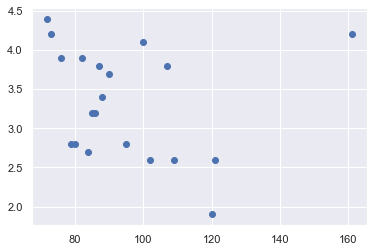

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

In [10]:
school = [4282, 1256, 1166, 1530, 352, 1320, 135, 1003, 1385, 914, 1309, 1266, 758, 775, 1596, 724, 1358, 685, 960]

In [5]:
school2 = [1058,1061,45,1391, 1075, 1087, 1091, 1094, 1082, 1101, 1106, 120, 1112, 440, 1115, 1117, 1118, 3071, 1122, 1270, 1513, 601, 1257, 617, 1321, 626, 1249, 1264, 1231, 825, 1610]

In [12]:
school = school + school2

In [23]:
get_data(963)

[('SUNY Geneseo', 'Aagesen David', 'Geography', 4.3, 66),
 ('SUNY Geneseo', 'Abbas Megan', 'History', 4.6, 21),
 ('SUNY Geneseo', 'Abonado Albert', 'English', 5.0, 5),
 ('SUNY Geneseo', 'Abrahams Zachary', 'Philosophy', 2.8, 2),
 ('SUNY Geneseo', 'Abromova Yalena', 'Anthropology', 2.2, 2),
 ('SUNY Geneseo', 'Adabra Kodjo', 'Languages', 4.3, 14),
 ('SUNY Geneseo', 'Adams Elizabeth ', 'Languages', 3.6, 5),
 ('SUNY Geneseo', 'Adams Beth', 'Languages', 4.3, 12),
 ('SUNY Geneseo', 'Adams Catherine', 'History', 2.7, 24),
 ('SUNY Geneseo', 'Adamson Shawn', 'English', 4.4, 17),
 ('SUNY Geneseo', 'Adelson Larry', 'Mathematics', 1.7, 6),
 ('SUNY Geneseo', 'Adelson Lawrence', 'Physics', 1.6, 27),
 ('SUNY Geneseo', 'Agostinelli Christina', 'Languages', 3.7, 15),
 ('SUNY Geneseo', 'Aguilar Dawn', 'Mathematics', 3.6, 10),
 ('SUNY Geneseo', 'Aguilar Cesar', 'Mathematics', 2.9, 11),
 ('SUNY Geneseo', 'Ahlquist Greg', 'Humanities', 4.3, 24),
 ('SUNY Geneseo', 'Aimers James', 'Anthropology', 3.6, 30),
 

In [75]:
import pandas as pd
df = pd.read_csv('prof_by_rating_count')


,name,rating,num_ratings
0,Chuderewicz Russell,3.4,446
1,Mateer Dirk,4.4,378
2,Peck Andrew,4.7,334
3,McLeod Mark,4.3,308
4,Quick Susan,1.6,282
...,...,...,...
4995,Wright Dwayne,5.0,1
4996,Wright Kate,4.0,1
4997,WU Hao,3.5,1
4998,Wu Xiaojie,3.0,1


(array([129.,   0.,   0.,   0.,   0.,  15.,   0.,  18.,   0.,   0.,  10.,
          0.,  41.,   0.,   0.,  23.,   0.,  21.,   0.,   0.,  29.,   0.,
         33.,   0.,   0., 134.,   0.,  42.,   0.,   0.,  60.,   0.,  77.,
          0.,  45.,   0.,   0., 123.,   0.,   0.,  53.,   0.,  80.,   0.,
          0., 108.,   0.,  70.,   0.,   0., 257.,   0.,  78.,   0.,   0.,
        121.,   0., 109.,   0.,   0.,  95.,   0., 196.,   0.,   0., 128.,
          0., 129.,   0., 184.,   0.,   0., 122.,   0.,   0., 397.,   0.,
        102.,   0.,   0., 191.,   0., 198.,   0.,   0., 124.,   0., 282.,
          0.,   0., 117.,   0., 150.,   0., 217.,   0.,   0.,  75.,   0.,
        617.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.

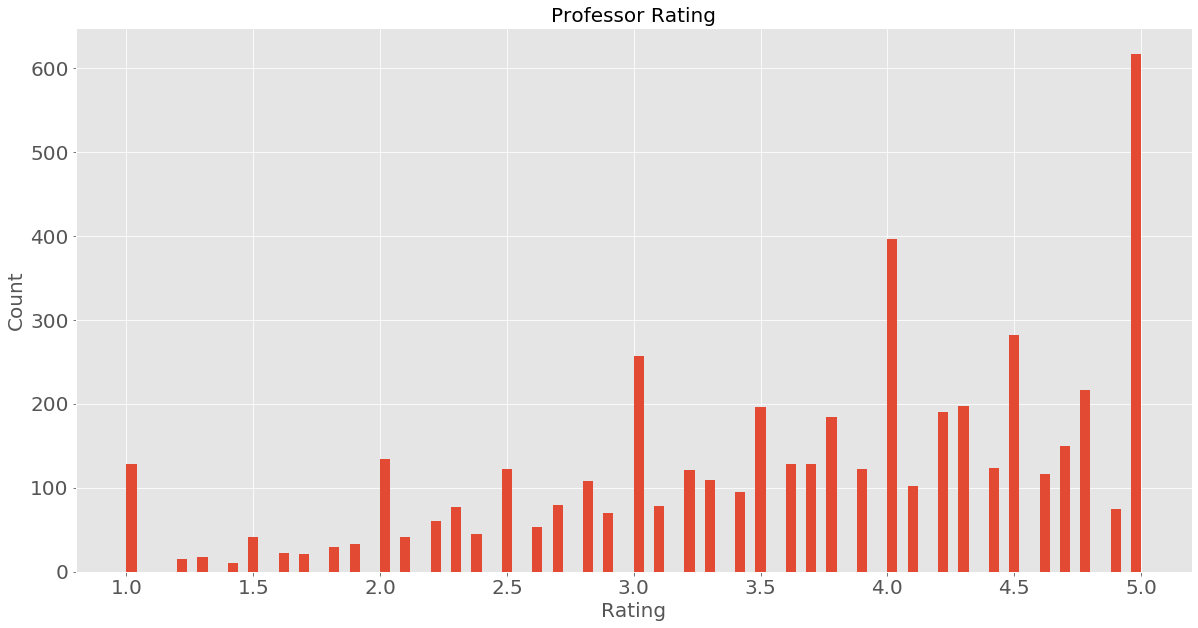

In [84]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.tick_params(labelsize = 20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Professor Rating', fontsize=20)
plt.hist(df['rating'], bins=100)


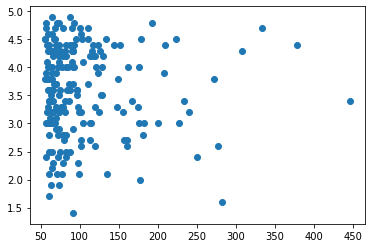

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df['num_ratings'].head(200)
y = df['rating'].head(200)
plt.scatter(x,y)

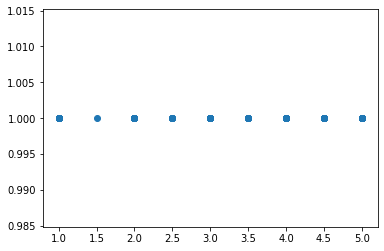

In [35]:
x = df['rating'].tail(200)
y = df['num_ratings'].tail(200)
plt.scatter(x, y)

In [50]:
first = (.1363636364)*4.84999
second = (.48484848)*4.5999
third = (.37878788)*4.199
classical_medieval_studies = first + second+ third

In [74]:
classical_medieval_studies

4.4821471041756356

In [57]:
total = 212
a = (3.8523809739521573)*(182/212)
b = (3.8199999809265135)*(30/212)
african_studies = a+b
african_studies

3.8477987579579627

In [61]:
tot = 2682
c = 3.534394903547445*(2665/tot)
d = 4.800000190734863*(17/tot)
bio = c+d
bio

3.5424170101403556

In [64]:
'Curriculum  Instruction', '4.333333333333333', '7'
'Curriculum & Instruction', '4.157142877578735', '17'
'Curriculum amp Instruction', '3.75', '6'
total1 = 30
e = 4.333333333333333*(7/total1)
f = 4.157142877578735*(17/total1)
g = 3.75*(6/total1)

curriculum_instruction = e+f+g
curriculum_instruction

4.116825408405727

In [77]:
'Engineering Science  Mechanics', '3.7500000397364297', '14'
'Engineering Science amp Mechanics', '3.25', '5'
'Engineering, Science, & Mechanics', '3.5500000715255737', '27'
total2 = 14+5+27
h = 3.7500000397364297*(14/total2)
i = 3.25*(5/total2)
j = 3.5500000715255737*(27/total2)
engineering_mechanics = h+i+j
total2

46

In [78]:
'Hotel  Restaurant Management', '2.8333333333333335', '10'
'Hotel & Restaurant Management', '3.875000011920929', '233'
'Hotel amp Restaurant Management', '5', '2'
total3 = 10+233+2
k = 2.8333333333333335*(10/total3)
l = 3.875000011920929*(233/total3)
m = 5*(2/total3)

hotel = k+l+m
total3

245

In [79]:
'Information Science', '3.5061224699020386', '800'
'Information Sciences  Technology', '3.7200000286102295', '337'
'Information Sciences & Technology', '2.9466666698455812', '189'
'Information Sciences amp Technology', '3.018181800842285', '36'
total4 = 800 + 337 + 189 + 36
a1 = 3.5061224699020386*(800/total4)
a2 = 3.7200000286102295*(337/total4)
a3 = 2.9466666698455812*(189/total4)
a4 = 3.018181800842285*(36/total4)

information_science_tech = a1+a2+a3+a4
information_science_tech
total4

1362

In [80]:
'Labor  Employment Relations', '4.440000009536743', '40'
'Labor & Employment Relations', '3.8571428614003316', '199'
'Labor amp Employment Relations', '3.6666666666666665', '7'
total5 = 40+199+7
b1 = 4.440000009536743*(40/total5)
b2 = 3.8571428614003316*(199/total5)
b3 = 3.6666666666666665*(7/total5)

labor_employment = b1+b2+b3
labor_employment
total5

246

In [81]:
'Landscape Architecture  Regional Planning', '2.700000047683716', '10'
'Landscape Architecture & Regional Planning', '3.6812499687075615', '85'
total6 = 10+85
c1 = 2.700000047683716*(10/total6)
c2 = 3.6812499687075615*(85/total6)
landscape = c1+c2
landscape
total6

95

In [82]:
'Recreation Parks  Tourism', '3.9000000303441826', '48'
'Recreation Parks amp Tourism', '2.5', '2'
'Recreation, Parks, & Tourism', '4.081250011920929', '92'
total7=48+2+92
d1 = 3.9000000303441826*(48/total7)
d2 = 2.5*(2/total7)
d3 = 4.081250011920929*(92/total7)

rec = d1+d2+d3
rec
total7

142

In [76]:
df1 = pd.read_csv('avg_dept_rating')
df1

,department,AVG(rating),SUM(num_ratings)
0,Writing,4.900000,6
1,Women's Studies,3.705556,418
2,Visual Arts,3.381818,63
3,Veterinary Sciences,4.085714,84
4,University Community,5.000000,1
...,...,...,...
141,Africana Studies,3.820000,30
142,African-American Studies,3.852381,182
143,Aerospace Engineering,3.463636,127
144,Actuarial Science,3.600000,19
